### Intro

Chronic Kidney Disease (CKD) patients are at higher risk for more severe illness. Due to immunosuppression, the kidney disease patients who appear most at risk for COVID-19. The complications of CKD are high blood pressure, anemia (low blood count), and poor nutritional health. So, developing a model to classify CKD patients is needed and an important to avoid the risk of this disease


### Predicting Chronic Kidney Disease based on health records

Given 24 health related attributes taken in 2-month period of 400 patients, using the information of the 158 patients with complete records to predict the outcome (i.e. whether one has chronic kidney disease) of the remaining 242 patients (with missing values in their records).

In [52]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import  confusion_matrix, classification_report
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [53]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import balanced_accuracy_score

In [54]:
#read and load data csv files
data = pd.read_csv('kidney_disease.csv')
#Check the 10 samples of train data
data.head(10)

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd
5,5,60.0,90.0,1.015,3.0,0.0,NaN,NaN,notpresent,notpresent,...,39,7800,4.4,yes,yes,no,good,yes,no,ckd
6,6,68.0,70.0,1.010,0.0,0.0,NaN,normal,notpresent,notpresent,...,36,NaN,NaN,no,no,no,good,no,no,ckd
7,7,24.0,NaN,1.015,2.0,4.0,normal,abnormal,notpresent,notpresent,...,44,6900,5,no,yes,no,good,yes,no,ckd
8,8,52.0,100.0,1.015,3.0,0.0,normal,abnormal,present,notpresent,...,33,9600,4.0,yes,yes,no,good,no,yes,ckd
9,9,53.0,90.0,1.020,2.0,0.0,abnormal,abnormal,present,notpresent,...,29,12100,3.7,yes,yes,no,poor,no,yes,ckd


In [55]:
#check simple information like  columns names ,  columns datatypes and null values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

In [56]:
NewCols={"bp":"blood_pressure","sg":"specific_gravity", "al":"albumin","su":"sugar","rbc":"red_blood_cells","pc":"pus_cell",
         "pcc":"pus_cell_clumps","ba":"bacteria","bgr":"blood_glucose_random","bu":"blood_urea","sc":"serum_creatinine",
         "sod":"sodium","pot":"potassium","hemo":"haemoglobin","pcv":"packed_cell_volume","wc":"white_blood_cell_count",
          "rc":"red_blood_cell_count","htn":"hypertension","dm":"diabetes_mellitus","cad":"coronary_artery_disease",
          "appet":"appetite","pe":"pedal_edema","ane":"anemia"}

In [57]:
# Change columns of CKD data to new columns
data.rename(columns=NewCols, inplace=True)

In [58]:
#check summary of numerical data  such as count , mean , max , min  and standard deviation.
data.describe()

,id,age,blood_pressure,specific_gravity,albumin,sugar,blood_glucose_random,blood_urea,serum_creatinine,sodium,potassium,haemoglobin
count,400.000000,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000
mean,199.500000,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437
std,115.614301,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587
min,0.000000,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000
25%,99.750000,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000
50%,199.500000,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000
75%,299.250000,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000
max,399.000000,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000


In [59]:
#check numbers of rows(samples) and columns(features)
data.shape

(400, 26)

In [60]:
#Check total missing values in each feature
data.isnull().sum()

id                           0
age                          9
blood_pressure              12
specific_gravity            47
albumin                     46
sugar                       49
red_blood_cells            152
pus_cell                    65
pus_cell_clumps              4
bacteria                     4
blood_glucose_random        44
blood_urea                  19
serum_creatinine            17
sodium                      87
potassium                   88
haemoglobin                 52
packed_cell_volume          70
white_blood_cell_count     105
red_blood_cell_count       130
hypertension                 2
diabetes_mellitus            2
coronary_artery_disease      2
appetite                     1
pedal_edema                  1
anemia                       1
classification               0
dtype: int64

In [61]:
#check count of values for each features
data.count()

id                         400
age                        391
blood_pressure             388
specific_gravity           353
albumin                    354
sugar                      351
red_blood_cells            248
pus_cell                   335
pus_cell_clumps            396
bacteria                   396
blood_glucose_random       356
blood_urea                 381
serum_creatinine           383
sodium                     313
potassium                  312
haemoglobin                348
packed_cell_volume         330
white_blood_cell_count     295
red_blood_cell_count       270
hypertension               398
diabetes_mellitus          398
coronary_artery_disease    398
appetite                   399
pedal_edema                399
anemia                     399
classification             400
dtype: int64

<AxesSubplot:>

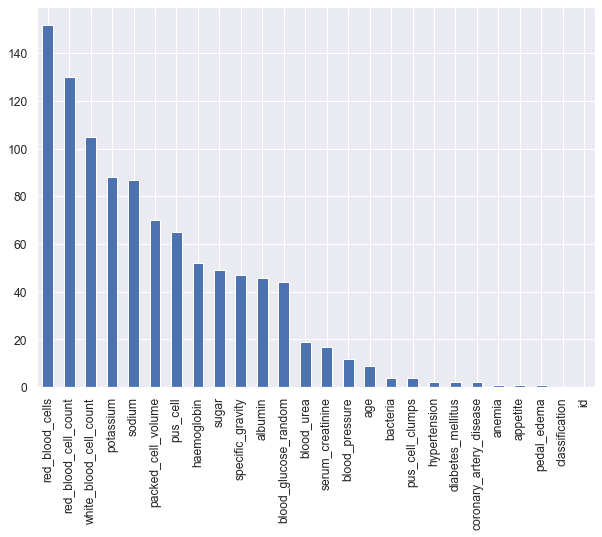

In [62]:
#visualization of null values in features
plt.subplots(figsize=(10, 7))
((data.isnull().sum())).sort_values(ascending=False).plot(kind='bar')

In [63]:
# Drop id column 
data.drop(["id"],axis=1,inplace=True) 

In [64]:
data[['red_blood_cells','pus_cell']] = data[['red_blood_cells','pus_cell']].replace(to_replace={'abnormal':1,'normal':0})
data[['pus_cell_clumps','bacteria']] = data[['pus_cell_clumps','bacteria']].replace(to_replace={'present':1,'notpresent':0})
data[['hypertension','diabetes_mellitus','coronary_artery_disease','pedal_edema','anemia']] = data[['hypertension','diabetes_mellitus','coronary_artery_disease','pedal_edema','anemia']].replace(to_replace={'yes':1,'no':0})
data[['appetite']] = data[['appetite']].replace(to_replace={'good':1,'poor':0,'no':np.nan})
data['coronary_artery_disease'] = data['coronary_artery_disease'].replace(to_replace='\tno',value=0)
data['diabetes_mellitus'] = data['diabetes_mellitus'].replace(to_replace={'\tno':0,'\tyes':1,' yes':1, '':np.nan})
data['classification'] = data['classification'].replace(to_replace={'ckd':1.0,'ckd\t':1.0,'notckd':0.0,'no':0.0})

In [65]:
data['pedal_edema'] = data['pedal_edema'].replace(to_replace='good',value=0) 
data['appetite'] = data['appetite'].replace(to_replace='no',value=0)
data['coronary_artery_disease']=data['coronary_artery_disease'].replace('yes',1)

#### Handling Missing Values

In [66]:
data['age']=data['age'].fillna(np.mean(data['age']))
data['blood_pressure']=data['blood_pressure'].fillna(np.mean(data['blood_pressure']))
data['albumin']=data['albumin'].fillna(np.mean(data['albumin']))

In [67]:
data['specific_gravity']=data['specific_gravity'].fillna(np.mean(data['specific_gravity']))
data['sugar']=data['sugar'].fillna(np.mean(data['sugar']))
data['blood_glucose_random']=data['blood_glucose_random'].fillna(np.mean(data['blood_glucose_random']))
data['blood_urea']=data['blood_urea'].fillna(np.mean(data['blood_urea']))
data['serum_creatinine']=data['serum_creatinine'].fillna(np.mean(data['serum_creatinine']))
data['haemoglobinhaemoglobin']=data['haemoglobin'].fillna(np.mean(data['haemoglobin']))
data['potassium']=data['potassium'].fillna(np.mean(data['potassium']))
data['sodium']=data['sodium'].fillna(np.mean(data['sodium']))

In [68]:
data = data.replace("\t?", np.nan)
data = data.replace(" ?", np.nan)
data = data.fillna(method='ffill')
data = data.fillna(method='backfill')

In [69]:
# Again ,Check missing values
data.isnull().sum()

age                        0
blood_pressure             0
specific_gravity           0
albumin                    0
sugar                      0
red_blood_cells            0
pus_cell                   0
pus_cell_clumps            0
bacteria                   0
blood_glucose_random       0
blood_urea                 0
serum_creatinine           0
sodium                     0
potassium                  0
haemoglobin                0
packed_cell_volume         0
white_blood_cell_count     0
red_blood_cell_count       0
hypertension               0
diabetes_mellitus          0
coronary_artery_disease    0
appetite                   0
pedal_edema                0
anemia                     0
classification             0
haemoglobinhaemoglobin     0
dtype: int64

#### Visualization

In [70]:
numericalFeatures = data.select_dtypes(include=np.number)
categoricalFeatures = data.select_dtypes(include='object')

In [71]:
numericalFeatures

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,...,potassium,haemoglobin,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,pedal_edema,anemia,classification,haemoglobinhaemoglobin
0,48.0,80.0,1.020,1.0,0.0,0.0,0.0,0.0,0.0,121.000000,...,4.627244,15.4,1.0,1.0,0.0,1.0,0.0,0.0,1.0,15.4
1,7.0,50.0,1.020,4.0,0.0,0.0,0.0,0.0,0.0,148.036517,...,4.627244,11.3,0.0,0.0,0.0,1.0,0.0,0.0,1.0,11.3
2,62.0,80.0,1.010,2.0,3.0,0.0,0.0,0.0,0.0,423.000000,...,4.627244,9.6,0.0,1.0,0.0,0.0,0.0,1.0,1.0,9.6
3,48.0,70.0,1.005,4.0,0.0,0.0,1.0,1.0,0.0,117.000000,...,2.500000,11.2,1.0,0.0,0.0,0.0,1.0,1.0,1.0,11.2
4,51.0,80.0,1.010,2.0,0.0,0.0,0.0,0.0,0.0,106.000000,...,4.627244,11.6,0.0,0.0,0.0,1.0,0.0,0.0,1.0,11.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,0.0,0.0,0.0,0.0,140.000000,...,4.900000,15.7,0.0,0.0,0.0,1.0,0.0,0.0,0.0,15.7
396,42.0,70.0,1.025,0.0,0.0,0.0,0.0,0.0,0.0,75.000000,...,3.500000,16.5,0.0,0.0,0.0,1.0,0.0,0.0,0.0,16.5
397,12.0,80.0,1.020,0.0,0.0,0.0,0.0,0.0,0.0,100.000000,...,4.400000,15.8,0.0,0.0,0.0,1.0,0.0,0.0,0.0,15.8
398,17.0,60.0,1.025,0.0,0.0,0.0,0.0,0.0,0.0,114.000000,...,4.900000,14.2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,14.2


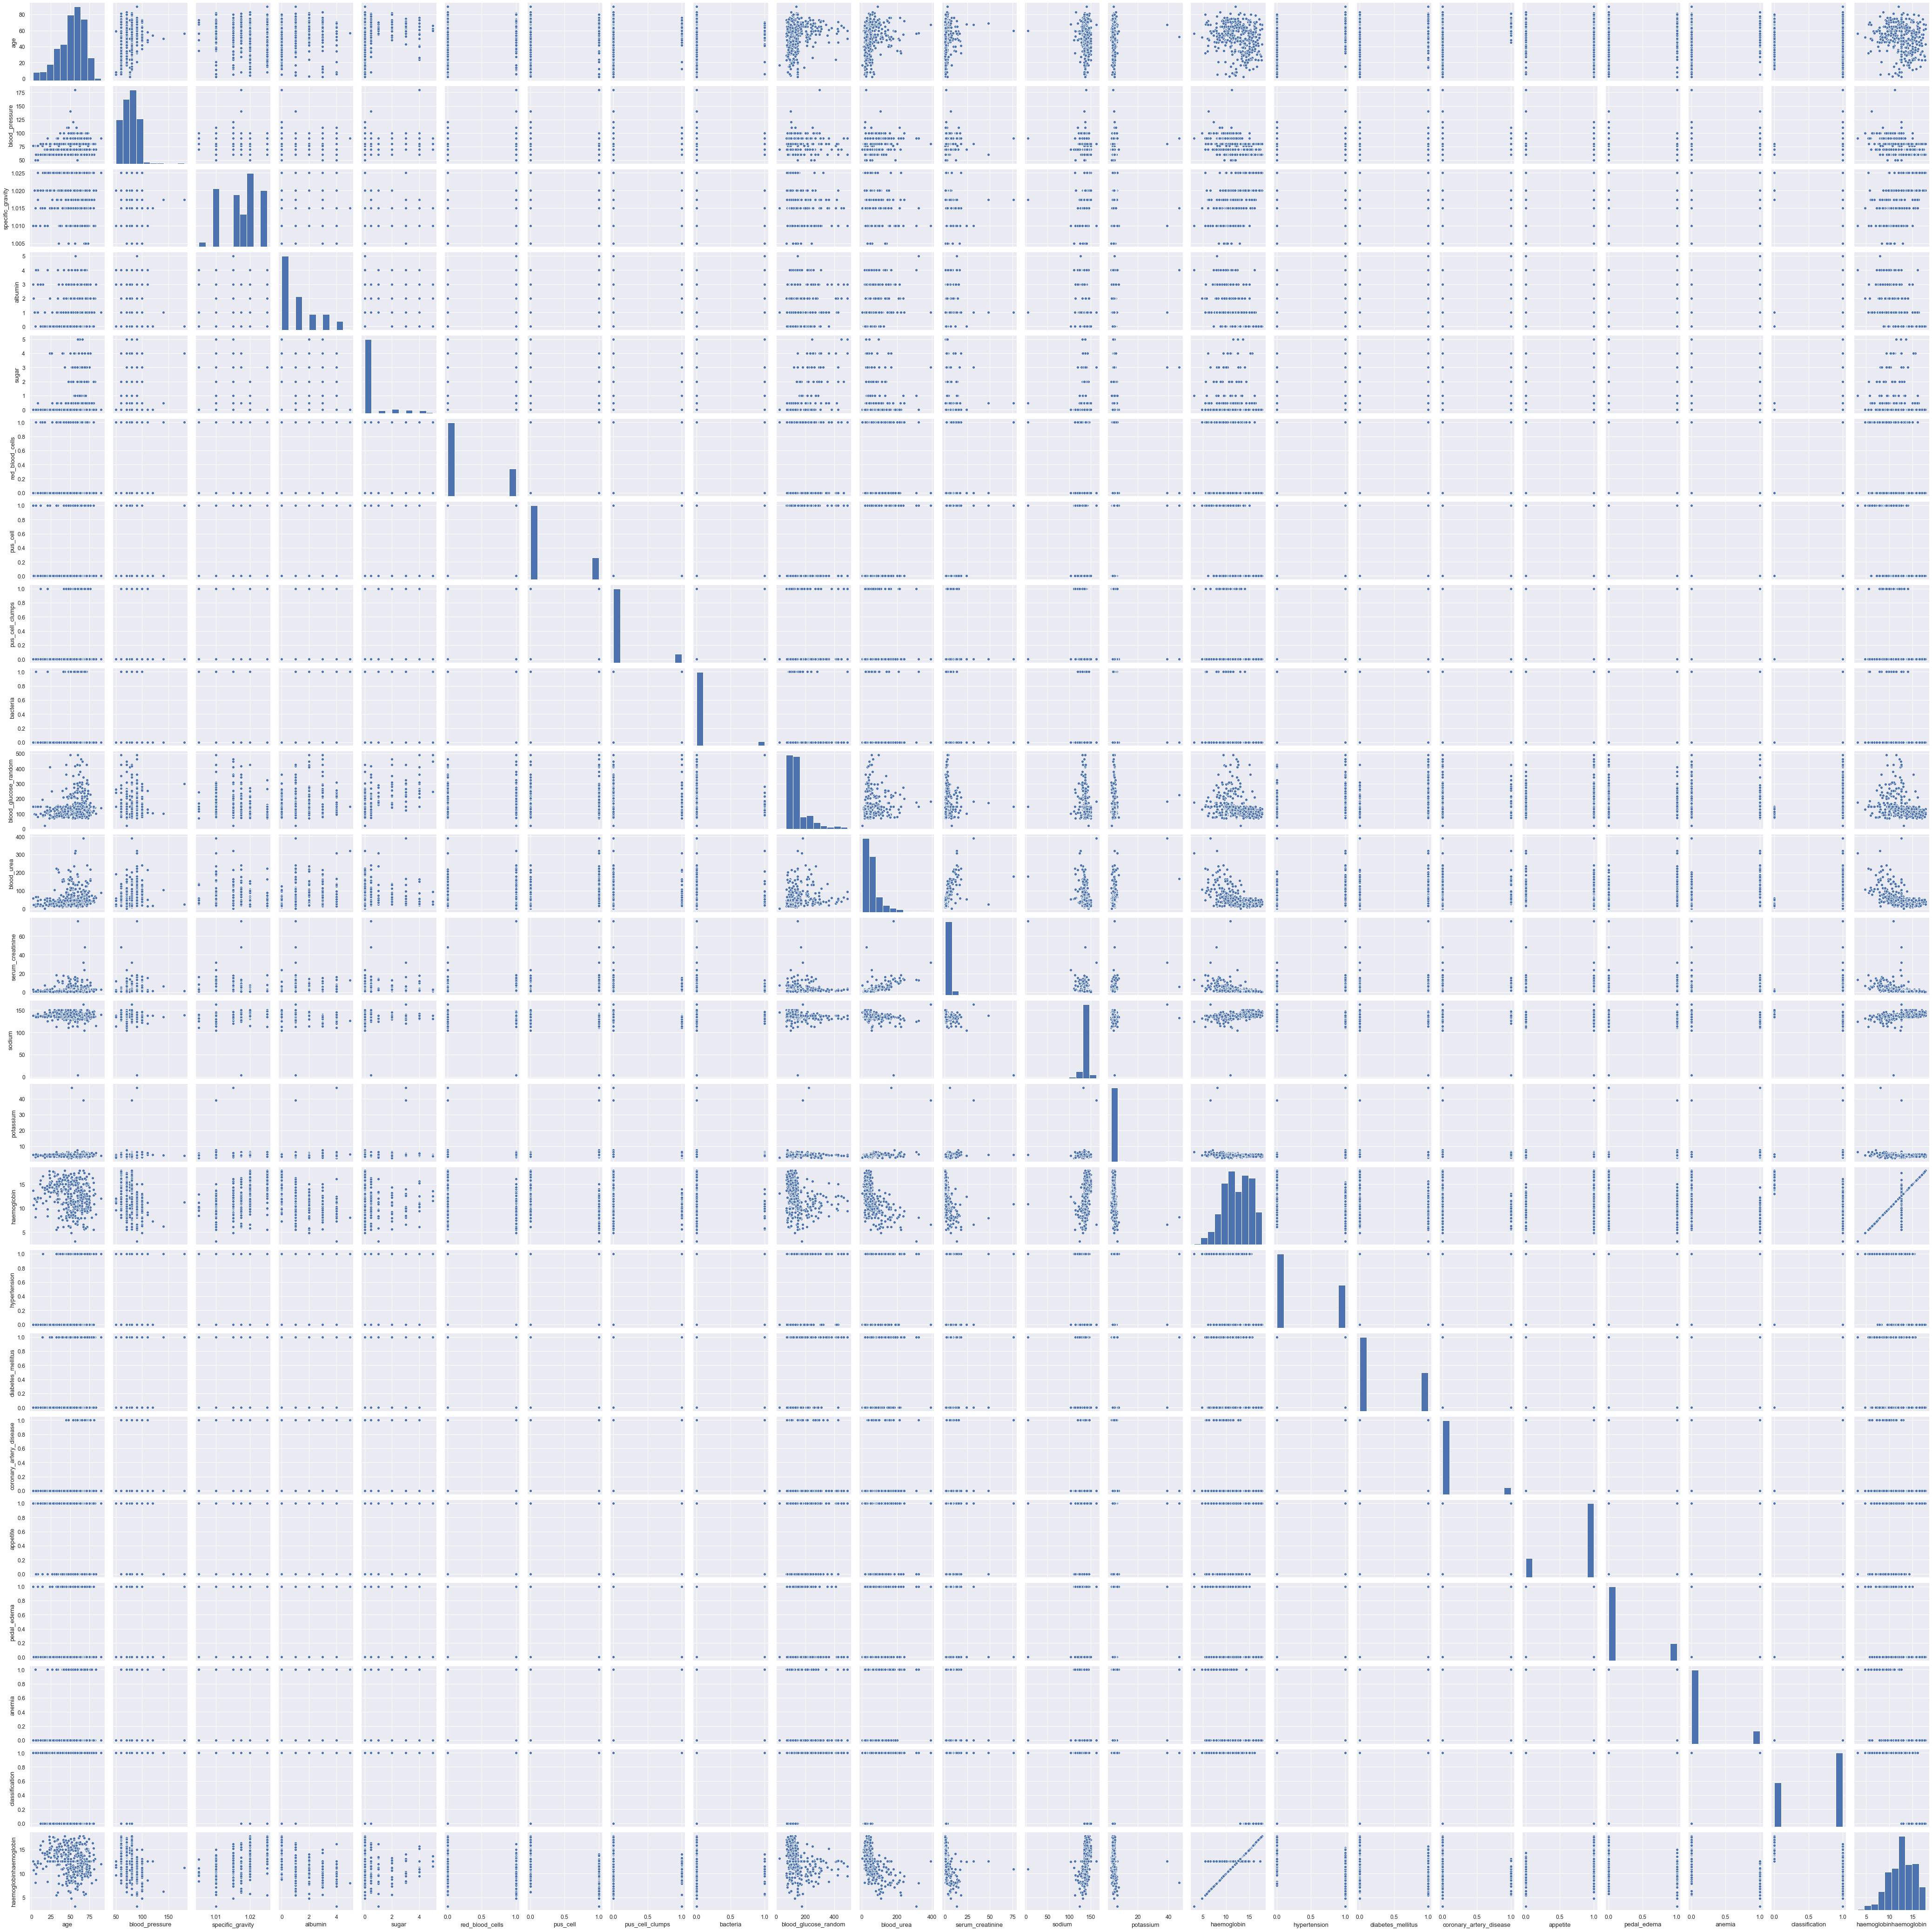

In [72]:
sns.pairplot(numericalFeatures)


In [73]:
categoricalFeatures

,packed_cell_volume,white_blood_cell_count,red_blood_cell_count
0,44,7800,5.2
1,38,6000,5.2
2,31,7500,5.2
3,32,6700,3.9
4,35,7300,4.6
...,...,...,...
395,47,6700,4.9
396,54,7800,6.2
397,49,6600,5.4
398,51,7200,5.9


In [74]:
datacorrnumerical=numericalFeatures.corr()

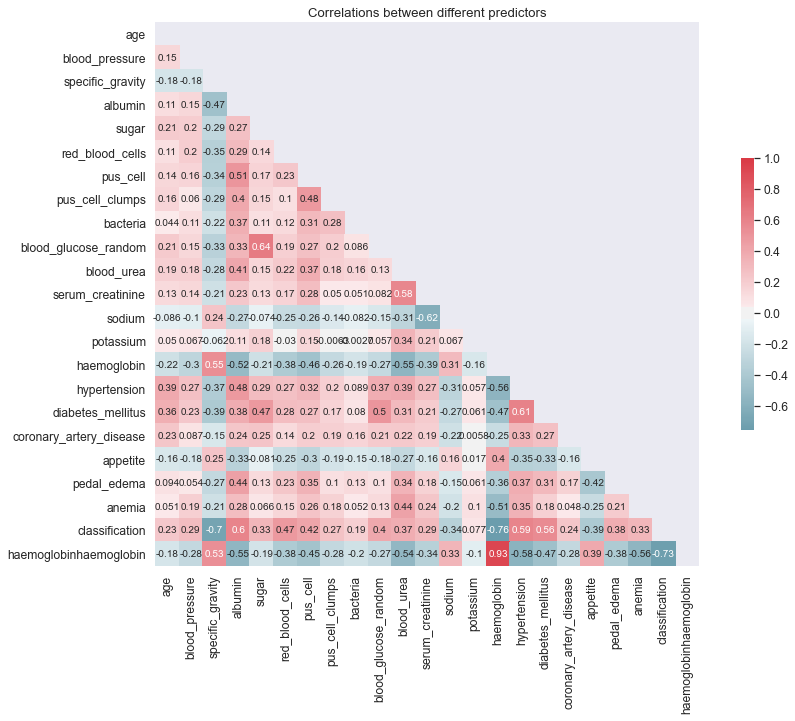

In [75]:
# Generate a mask for the upper triangle
mask = np.zeros_like(datacorrnumerical, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(15,10))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(datacorrnumerical,annot=True, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True,  cbar_kws={"shrink": .5})
plt.title('Correlations between different predictors')
plt.show()

<AxesSubplot:xlabel='hypertension', ylabel='specific_gravity'>

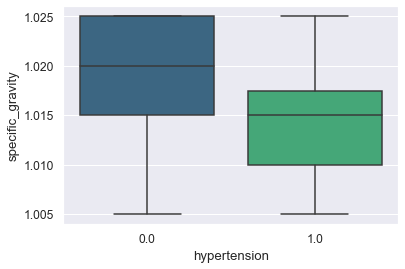

In [76]:
sns.boxplot(x='hypertension', y='specific_gravity', data=data, palette='viridis')

<AxesSubplot:xlabel='hypertension', ylabel='albumin'>

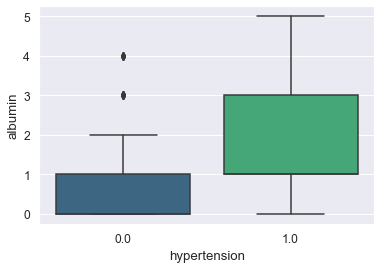

In [77]:
sns.boxplot(x='hypertension', y='albumin', data=data, palette='viridis')

<AxesSubplot:xlabel='hypertension', ylabel='age'>

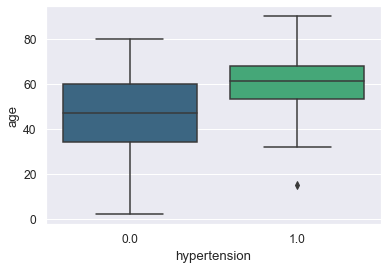

In [78]:
sns.boxplot(x='hypertension', y='age', data=data, palette='viridis')

In [79]:
X = data.iloc[:, :-1]
y = data.iloc[:, 24]
X=X.drop('classification', axis=1)

In [80]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [81]:
from sklearn.tree import DecisionTreeClassifier
modeldt = DecisionTreeClassifier()
modeldt.fit(x_train, y_train)

DecisionTreeClassifier()

In [82]:
y_preddt = modeldt.predict(x_test)
y_preddt

array([1., 0., 1., 1., 1., 1., 0., 1., 0., 1., 1., 0., 1., 1., 1., 1., 0.,
       0., 1., 0., 1., 1., 0., 0., 0., 0., 1., 1., 0., 1., 0., 1., 0., 1.,
       1., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1.,
       0., 0., 1., 0., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 0., 0.,
       0., 1., 0., 1., 1., 1., 0., 1., 1., 0., 1., 0., 1., 1., 1., 0., 0.,
       1., 1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 0., 0., 1., 1.])

In [83]:
CMDT=confusion_matrix(y_test,y_preddt)
CMDT

array([[35,  0],
       [ 1, 64]], dtype=int64)

In [84]:
print(classification_report(y_test, y_preddt))

              precision    recall  f1-score   support

         0.0       0.97      1.00      0.99        35
         1.0       1.00      0.98      0.99        65

    accuracy                           0.99       100
   macro avg       0.99      0.99      0.99       100
weighted avg       0.99      0.99      0.99       100



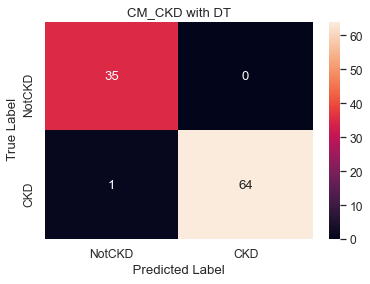

In [85]:
sns.set(font_scale=1.1)
sns.heatmap(CMDT, annot=True,fmt="g")
ax= plt.subplot()
plt.title("CM_CKD with DT")
#plt.tight_layout()
plt.ylabel(' True Label')
plt.xlabel(' Predicted Label ')
ax.xaxis.set_ticklabels(['NotCKD', 'CKD']); ax.yaxis.set_ticklabels(['NotCKD', 'CKD']);
plt.show()

In [86]:
############## DT ##########
accuracy = accuracy_score(y_test,y_preddt)
print('Accuracy: %f' % accuracy)
accuracy = balanced_accuracy_score(y_test,y_preddt)
print('Balanced_Accuracy: %f' % accuracy)
precision = precision_score(y_test,y_preddt)
print('Precision: %f' % precision)
recall = recall_score(y_test,y_preddt)
print('Recall: %f' % recall)
f1 = f1_score(y_test,y_preddt)
print('F1 score: %f' % f1)

Accuracy: 0.990000
Balanced_Accuracy: 0.992308
Precision: 1.000000
Recall: 0.984615
F1 score: 0.992248
